<a href="https://colab.research.google.com/github/nathaliasch/MVP_Pos_DataScience/blob/master/MVP_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=10>MVP - Nathalia Schmucler</font>
***

##<font color=purple size=6>Disciplina: Machine Learning & Analytics (Sprint 2)</font>

#<font color=purple size=6>Machine Learning: Problema de Classificação utilizando métodos clássicos </font>



O objetivo do problema é prever se a renda da pessoa excede a US$ 50.000 por ano com base nos dados do censo.

O conjunto de dados foi obtido do repositório UCI (https://archive.ics.uci.edu/dataset/2/adult), sem valores ausentes e é composto de 14 atributos e uma variável target:

*  age : idade dos indivíduos em anos
* workclass : classe de trabalho categorizado em 9 categorias
* final-weight :  variável contínua
* education : nível de educação categorizado em 16 categorias
* education-num : número de anos estudados
* marital-status : estado-civil categorizado em 7 categorias
* occupation : ocupação categorizado em 15 categorias
* relationship : relacionamento categorizado em 6 categorias
* race : raça categorizado em 5 categorias
* sex : sexo categorizado em 2 categorias
* capital-gain : ganho de capital
* capital-loos : perda de capital
* hour-per-week : horas trabalhadas por semana
* native-country : país categorizada em 42 categorias
* income : renda (target)



In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns # para plotar o heatmap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_validate # para executar a validação cruzada
from sklearn.metrics import classification_report # para exibir o relatório com precisão, recall e f1 score
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [ ]:
# importando o arquivo do google drive
import csv
!pip install gdown
import gdown

file_id = "1x-O2S4KL0qQiByFzOtHhuhezOMC_LVC4"
url = "https://drive.google.com/uc?id=1x-O2S4KL0qQiByFzOtHhuhezOMC_LVC4"
output = "census.csv"
gdown.download(url, output)



Downloading...
From: https://drive.google.com/uc?id=1x-O2S4KL0qQiByFzOtHhuhezOMC_LVC4
To: /content/census.csv
100%|██████████| 4.01M/4.01M [00:00<00:00, 174MB/s]


'census.csv'

In [ ]:
# carga do dataset através do csv
url_dados = 'https://drive.google.com/uc?id=1x-O2S4KL0qQiByFzOtHhuhezOMC_LVC4'

dataset = pd.read_csv(url_dados)

dataset

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#verificando se há dados faltantes
dataset.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
# verificando os tipos de dados do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: >

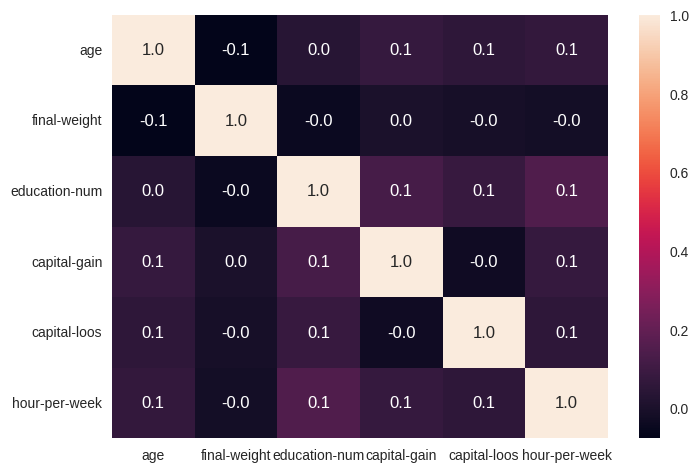

In [ ]:
#verificando a correlação entre todas as variáveis
matriz_correlacao = dataset.corr()
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

# <font color=purple size=4> Preparação de Dados

Objetivo é separar o dataset entre treino e teste e tratar as variáveis categóricas.

Esse conjunto de dados tem 32.561 registros. Com uma divisão de 80% para treino e 20% para teste há uma quantidade razoável de dados para treinar o modelo e uma porção significativa para avaliar o desempenho. Logo, a validação cruzada, apesar de ter sido feita, não é estritamente necessária.

Foi refinada a quantidade de atributos disponíveis com o processo de feature selection.


## <font color=purple size=4>Tratamento do atributo categórico ordinal (coluna education) em numérico

In [ ]:
# Criando uma instância do LabelEncoder
label_encoder_education = LabelEncoder()

# Transformando os atributos categóricos no conjunto de treino
dataset['education'] = label_encoder_education.fit_transform(dataset['education'])

dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## <font color=purple size=4>Tratamento do atributo target(coluna income)

In [ ]:
#verificando quais os valores que possui a coluna income
unique_values = dataset['income'].unique()
print(unique_values)

[' <=50K' ' >50K']


In [ ]:
# tratando os valores da coluna income (target) usando dicionário do pandas
income_dic = {' <=50K' : 0,
              ' >50K' : 1}

dataset['income'] = dataset[['income']].replace(income_dic)
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## <font color=purple size=4>Tratamento dos atributos categóricos nominais em numéricos

In [ ]:
#usando a função dummies
dataset_dummies = pd.get_dummies(dataset, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)
dataset_dummies.head()

,age,final-weight,education,education-num,capital-gain,capital-loos,hour-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,9,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color=purple size=4>Separação em bases de treino e teste (holdout)

In [ ]:
#separando o target do dataset
dataset = dataset_dummies

X = dataset_dummies.drop(columns = 'income')
X.head()

,age,final-weight,education,education-num,capital-gain,capital-loos,hour-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,9,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#verificando quantas colunas ficaram no dataset

print(X.shape)

(32561, 86)


In [ ]:
y = dataset_dummies['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [ ]:
# faz a divisão

SEED = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

In [ ]:
#verificando o tamanho da base de treino e de teste
base_treino = X_train.shape[0]
base_teste = X_test.shape[0]
print('A base de teste de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de teste de treino tem 22792 elementos e a base de teste tem 9769 elementos.


## <font color=purple size=4>Feature selection

In [ ]:
# Criando um classificador baseado em árvores
clf = RandomForestClassifier(random_state=10)

# Realizando a seleção de características com base na importância
feature_selector = SelectFromModel(clf, threshold='median')
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Obtendo os índices das características selecionadas
feature_indices = feature_selector.get_support(indices=True)

# Obtendo os nomes das características selecionadas
feature_names = X.columns[feature_indices]

# Imprimindo as características selecionadas
print("Características selecionadas:")
for feature in feature_names:
    print(feature)


Características selecionadas:
age
final-weight
education
education-num
capital-gain
capital-loos
hour-per-week
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
marital-status_ Married-civ-spouse
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-service
occupation_ Prof-specialty
occupation_ Protective-serv
occupation_ Sales
occupation_ Tech-support
occupation_ Transport-moving
relationship_ Not-in-family
relationship_ Other-relative
relationship_ Own-child
relationship_ Unmarried
relationship_ Wife
race_ Asian-Pac-Islander
race_ Black
race_ White
sex_ Male
native-country_ Canada
native-country_ Germany
native-country_ Mexico
native-country_ Philippines
native-country_ United-States


In [ ]:
#verificando quantas colunas ficaram após fazer o feature selection

print(X_train_selected.shape)

(22792, 43)


In [ ]:
#salvando a base de dados

import pickle

with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_train_selected, y_train, X_test_selected, y_test], f)

## <font color=purple size=4>Cross Validation

In [ ]:
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=5)

# <font color=purple size=4>Modelagem e treinamento:

Objetivo é construir modelos para resolver o problema em questão.

Os algoritmos utilizados foram KNN, Árvore de Classificação, Naive Bayes e SVM. E verificado que o modelo que apresentou melhor acurácia foi a Árvore de decisão.

KNN: 0.773736 (0.005212)
CART: 0.814803 (0.008966)
NB: 0.793919 (0.007465)
SVM: 0.792252 (0.008922)


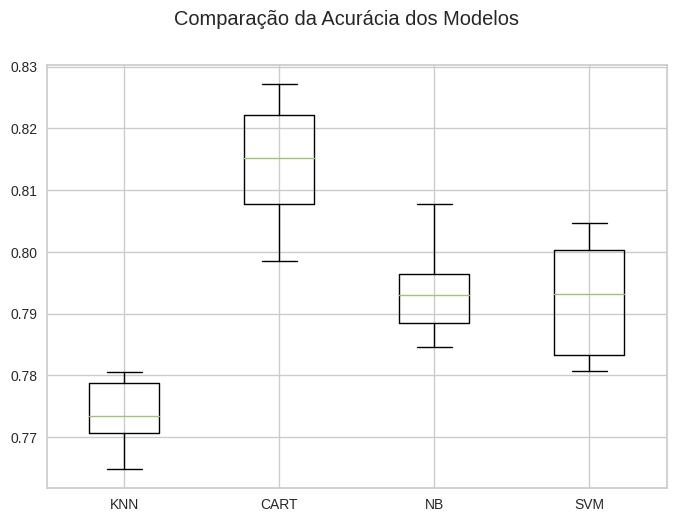

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(10)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#define uma semente aleatória para obter os mesmos resultados aleatórios
np.random.seed(10)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X, y, cv = 5, return_train_score=False)
media = results ['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Acurácia com cross validation, 3 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))


Acurácia com cross validation, 3 = [82.00, 83.65]


## <font color=purple size=4>Árvore de Classificação

In [ ]:
# Criando um modelo com todo o conjunto de treino usando o critério de entropia
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train_selected, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test_selected)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8153342204933974


0.8153342204933974

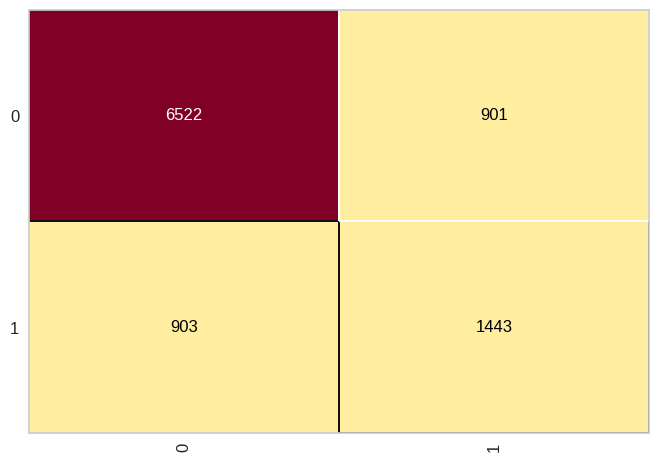

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)
cm.fit(X_train_selected, y_train)
cm.score(X_test_selected, y_test)

In [ ]:
# Organizando e compilando as funções derivadas da matriz de confusão
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7423
           1       0.62      0.62      0.62      2346

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



## <font color=purple size=4>Naive Bayes


In [ ]:
nb = GaussianNB()
nb.fit(X_train_selected, y_train)
predicts = nb.predict(X_test_selected)
predicts

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, predicts) # não executar o escalonamento

0.7927116388576108

0.7927116388576108

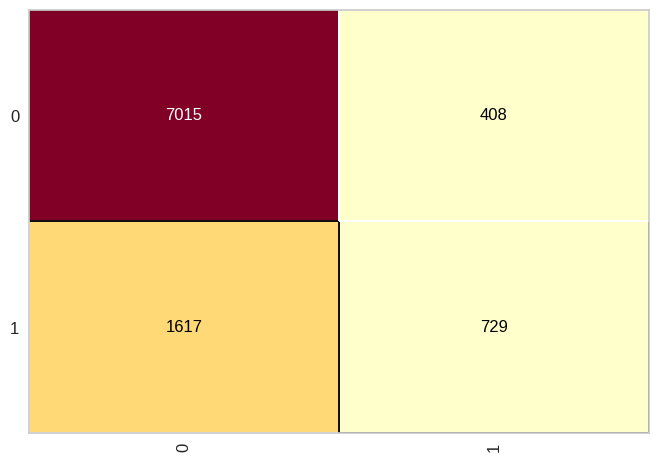

In [ ]:
cm = ConfusionMatrix(nb)
cm.fit(X_train_selected, y_train)
cm.score(X_test_selected, y_test)

In [ ]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7423
           1       0.64      0.31      0.42      2346

    accuracy                           0.79      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.77      0.79      0.76      9769



# <font color=purple size=5>Avaliação de Resultados:

#<font color=purple size=4> O objetivo foi analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste).

#<font color=purple size=4>Analisei com base na Árvore de Classificação e Naive Bayes que foram os modelos que apresentaram melhor acurácia.

#<font color=purple size=4>Analisando as métricas, podemos considerar que o modelo baseado na Árvore de Classificação apresenta um melhor resultado em geral. Ele possui uma precisão e recall melhores para ambas as classes, resultando em F1-Scores mais altos. Além disso, a acurácia total (81%) também é mais alta nele.